# Logistic Regression

## Exercises
In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Create a new notebook, logistic_regression, use it to answer the following questions:

## Imports

In [43]:
import acquire
import prepare

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

#### Acquire, Prep, Slipt and find the baseline

In [44]:
# Get your titanic data
titanic_df = acquire.get_titanic_data()

csv file found and loaded


In [45]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [46]:
titanic_df.shape

(891, 13)

In [47]:
# Clean the new dataset using the new function called prep_titanic
titanic_df = prepare.prep_titanic_dropna(titanic_df)

In [48]:
train, validate, test = prepare.split_function(titanic_df, 'survived')

In [49]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
548,548,0,3,male,33.0,1,1,20.525,S,0,1,0,1
133,133,1,2,female,29.0,1,0,26.000,S,0,0,0,1
540,540,1,1,female,36.0,0,2,71.000,S,0,0,0,1
2,2,1,3,female,26.0,0,0,7.925,S,1,0,0,1
649,649,1,3,female,23.0,0,0,7.550,S,1,0,0,1


In [50]:
print(f'Prepared df: {titanic_df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (714, 13)

Train: (428, 13)
Validate: (143, 13)
Test: (143, 13)


In [51]:
train.survived.value_counts()

0    254
1    174
Name: survived, dtype: int64

In [52]:
train.survived

548    0
133    1
540    1
2      1
649    1
      ..
774    1
664    1
842    1
286    1
834    0
Name: survived, Length: 428, dtype: int64

In [53]:
baseline_accuracy = (train.survived == 0).mean()
baseline_accuracy

0.5934579439252337

In [54]:
# ---------------------------------------------------------------------------------
# Lets drop 'passenger_id', 'survived', 'sex', 'embarked' because they either are objects or don't add value to the data.
# Also, we need to remove the 'survived' column because is our TARGET.
# Also, lets convert train, validate and test. 
X_train = train.drop(columns = ['survived','passenger_id','sex','embarked'])
X_validate = validate.drop(columns = ['survived','passenger_id','sex','embarked'])
X_test = test.drop(columns = ['survived','passenger_id','sex','embarked'])
print(f'X_train: {X_train.shape}')
print(f'X_validate: {X_validate.shape}')
print(f'X_test: {X_test.shape}\n')


X_train: (428, 9)
X_validate: (143, 9)
X_test: (143, 9)



In [55]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
548,3,33.0,1,1,20.525,0,1,0,1
133,2,29.0,1,0,26.000,0,0,0,1
540,1,36.0,0,2,71.000,0,0,0,1
2,3,26.0,0,0,7.925,1,0,0,1
649,3,23.0,0,0,7.550,1,0,0,1


In [56]:
target = 'survived'

In [57]:
# ---------------------------------------------------------------------------------

# 'y' variable are series
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

In [58]:
y_train.head()

548    0
133    1
540    1
2      1
649    1
Name: survived, dtype: int64

In [59]:
y_train.value_counts()

0    254
1    174
Name: survived, dtype: int64

In [60]:
(y_train == 0).mean()

0.5934579439252337

### 1. Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [61]:
# Set your features
features = ['age','fare','pclass']

In [62]:
X_train[features].head()

,age,fare,pclass
548,33.0,20.525,3
133,29.0,26.000,2
540,36.0,71.000,1
2,26.0,7.925,3
649,23.0,7.550,3


#### a. Creat it

In [63]:
logit = LogisticRegression()
logit

LogisticRegression()

#### b. Fit it

In [64]:
logit.fit(X_train[features], y_train)

LogisticRegression()

#### c. Use it

In [65]:
logit.score(X_train[features], y_train)

0.6985981308411215

>This model performs better than the baseline.

#### d. take a look at predictions

In [66]:
y_pred = logit.predict(X_train[features])
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,

#### e. View raw probabilityes (output from the model)

In [67]:
logit.predict_proba(X_train[features]).round(2)[:5]

array([[0.81, 0.19],
       [0.53, 0.47],
       [0.3 , 0.7 ],
       [0.77, 0.23],
       [0.75, 0.25]])

In [68]:
# Label the columns with a 0 and 1
labels = sorted(y_train.unique())
labels

[0, 1]

#### f. Score

In [69]:
logit.score(X_train[features], y_train)

0.6985981308411215

#### g. Confusion matrix (cm)

In [70]:
#conf matrix
cm = confusion_matrix(y_train, y_pred) #rows, columns
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'],
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,208,46
Actual 1,83,91


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


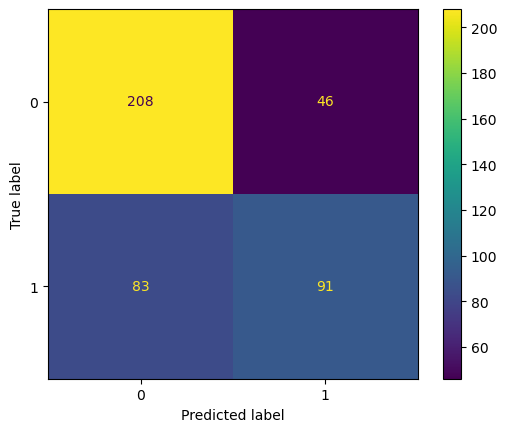

In [72]:
plot_confusion_matrix(logit, X_train[features], y_train)

### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [30]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S
548,3,33.0,1,1,20.525,0,1,0,1
133,2,29.0,1,0,26.000,0,0,0,1
540,1,36.0,0,2,71.000,0,0,0,1
2,3,26.0,0,0,7.925,1,0,0,1
649,3,23.0,0,0,7.550,1,0,0,1


In [73]:
features2 = ['age','fare','pclass','sex_male']
X_train[features2].head()

,age,fare,pclass,sex_male
548,33.0,20.525,3,1
133,29.0,26.000,2,0
540,36.0,71.000,1,0
2,26.0,7.925,3,0
649,23.0,7.550,3,0


In [74]:
logit2 = LogisticRegression()
logit2.fit(X_train[features2], y_train)
logit2.score(X_train[features2], y_train)

0.7873831775700935

In [78]:
print(f'{classification_report(y_train, logit.predict(X_train[features]))}')

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       254
           1       0.66      0.52      0.59       174

    accuracy                           0.70       428
   macro avg       0.69      0.67      0.67       428
weighted avg       0.69      0.70      0.69       428



In [79]:
X_train[features2].columns

Index(['age', 'fare', 'pclass', 'sex_male'], dtype='object')

### 3. Try out other combinations of features and models.

In [80]:
# Change hyperparameter C = 0.01
logit3 = LogisticRegression(C=0.01)
logit3.fit(X_train[features2], y_train)
logit3.predict(X_train[features2])
logit3.score(X_train[features2], y_train)

0.7009345794392523

In [81]:
# Change hyperparameter C = 0.01
logit4 = LogisticRegression(C=0.05)
logit4.fit(X_train[features2], y_train)
logit4.predict(X_train[features2])
logit4.score(X_train[features2], y_train)

0.7827102803738317

In [82]:
features3 = ['age','fare','pclass','sex_male','sibsp']
X_train[features3].head()

,age,fare,pclass,sex_male,sibsp
548,33.0,20.525,3,1,1
133,29.0,26.000,2,0,1
540,36.0,71.000,1,0,0
2,26.0,7.925,3,0,0
649,23.0,7.550,3,0,0


In [83]:
# Includes the following features: 'age','fare','pclass','sex_male','sibsp'
# Change hyperparameter C = 0.01
logit4 = LogisticRegression(C=0.05)
logit4.fit(X_train[features3], y_train)
logit4.predict(X_train[features3])
logit4.score(X_train[features3], y_train)

0.8060747663551402

### 4. Use you best 3 models to predict and evaluate on your validate sample.

In [84]:
logit.score(X_train[features], y_train)

0.6985981308411215

In [85]:
logit.score(X_validate[features], y_validate)

0.6923076923076923

In [86]:
logit2.score(X_train[features2], y_train)

0.7873831775700935

In [87]:
logit2.score(X_validate[features2], y_validate)

0.7692307692307693

In [88]:
logit3.score(X_train[features2], y_train)

0.7009345794392523

In [89]:
logit3.score(X_validate[features2], y_validate)

0.7342657342657343

In [90]:
logit4.score(X_train[features3], y_train)

0.8060747663551402

In [91]:
logit4.score(X_validate[features3], y_validate)

0.7622377622377622

### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [95]:
logit4.score(X_test[features3], y_test)

0.7972027972027972